# **1. Inspecting credit card applications**

---

Commercial banks receive a large number of credit card applications. Many of them are refused for a variety of reasons, such as large loan balances, low income levels, or too many inquiries on an individual's credit report. Manually assessing these programs is time-consuming, error-prone, and tedious. Fortunately, with the power of machine learning, this work can be automated, and almost every commercial bank does so nowadays. In this notebook, we will use machine learning techniques to create an automatic credit card approval predictor, much like real banks.

The <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository is used here. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features.

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Defining the file path to our CSV file
file_path = "/content/drive/My Drive/Credit Card Approval Dataset.csv"

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path, header=None)

Mounted at /content/drive


In [ ]:
# Defining the column names
headers = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

# Reading the CSV file and specifying the column names
df = pd.read_csv(file_path, names=headers)

In [ ]:
# Inspecting the data
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [ ]:
# Printing DataFrame information
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [ ]:
# Printing summary statistics
df_description = df.describe()
print(df_description)

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


# **2. Exploratory Data Analysis**

---

Data is explored through visualizations such as correlation matrices, bar charts for categorical features, and histograms for numeric features.

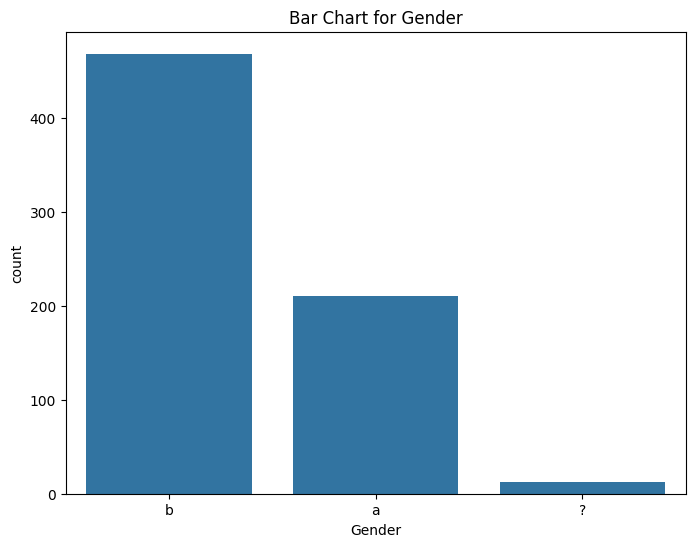

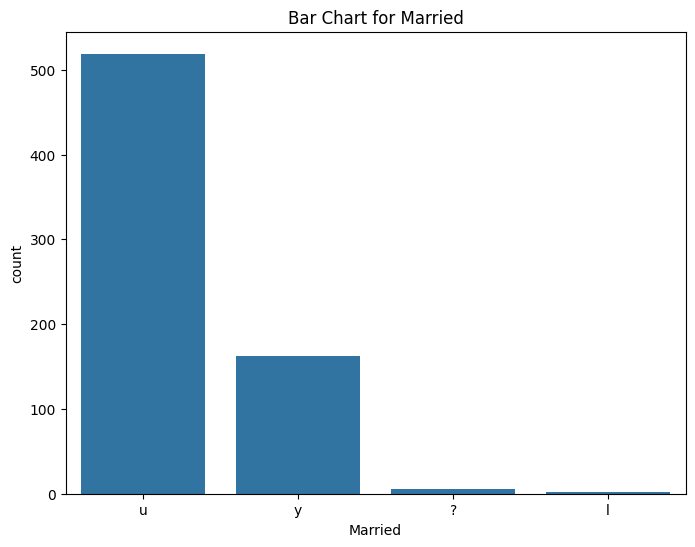

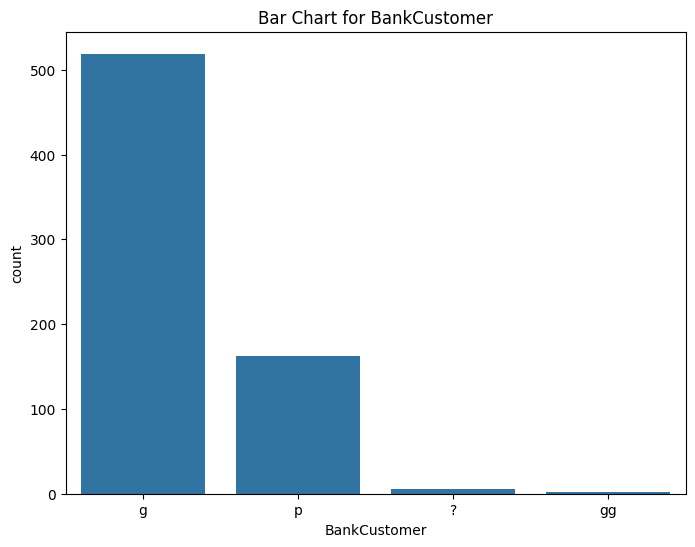

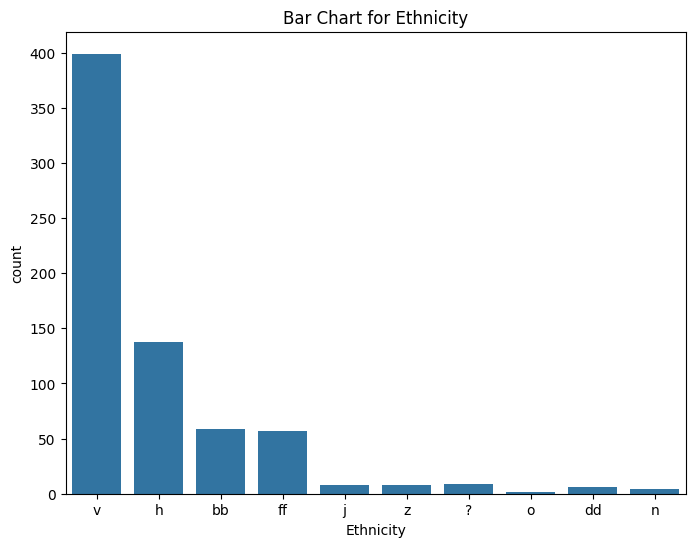

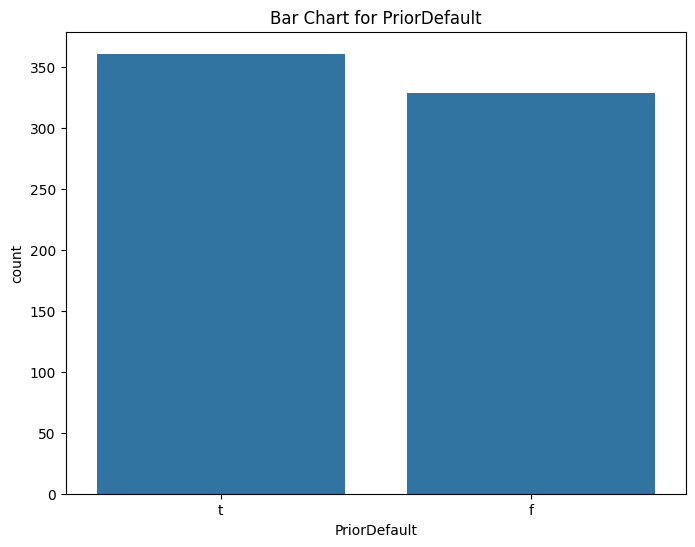

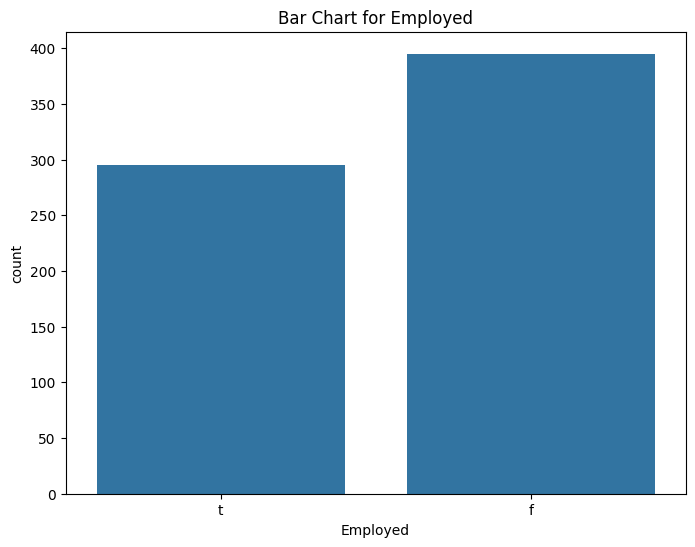

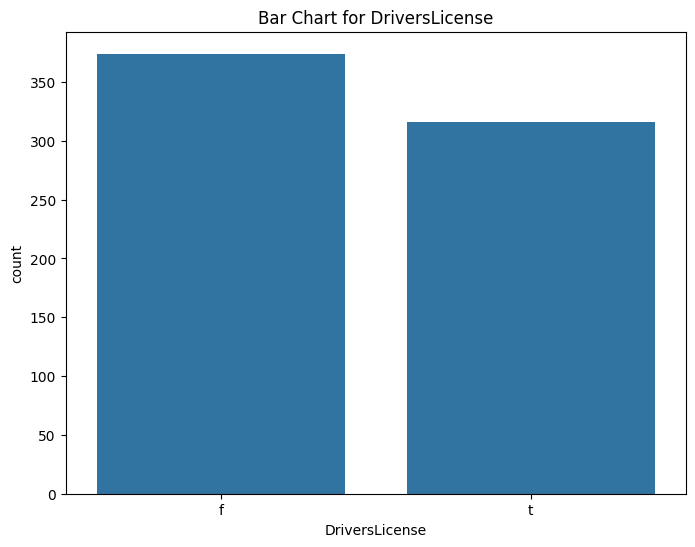

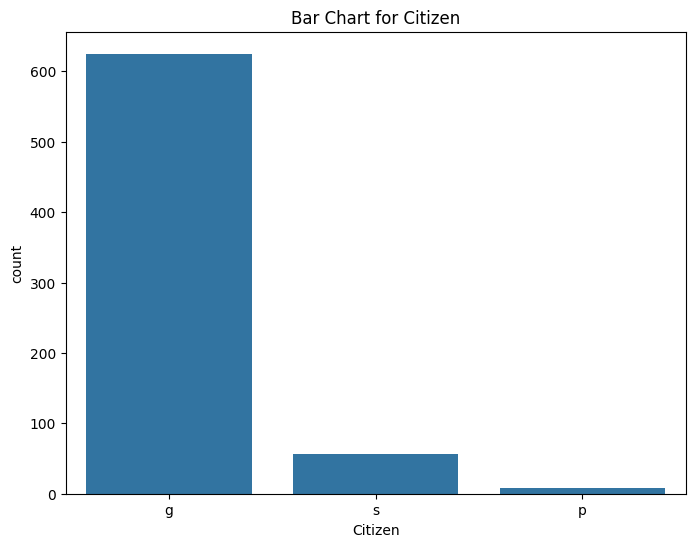

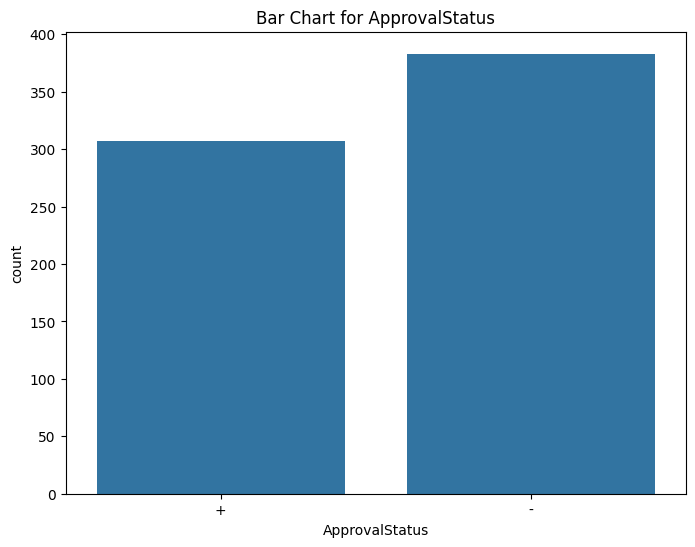

In [ ]:
# Selecting non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Creating individual bar charts for each non-numeric column
for column in non_numeric_columns.columns:
    if non_numeric_columns[column].nunique() <= 10:
        # If there are a reasonable number of unique values, create a bar chart
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column)
        plt.title(f'Bar Chart for {column}')
        plt.xticks(rotation=0)
        plt.show()

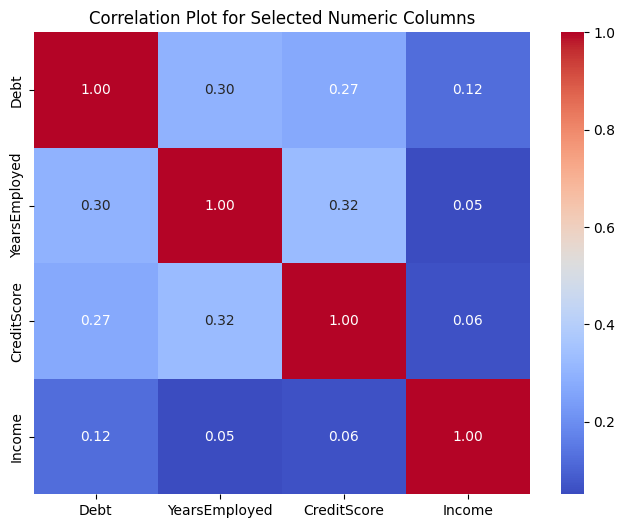

In [ ]:
# Selectin specific numeric columns by index
numeric_columns = df.select_dtypes(include=['number'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Selected Numeric Columns')
plt.show()

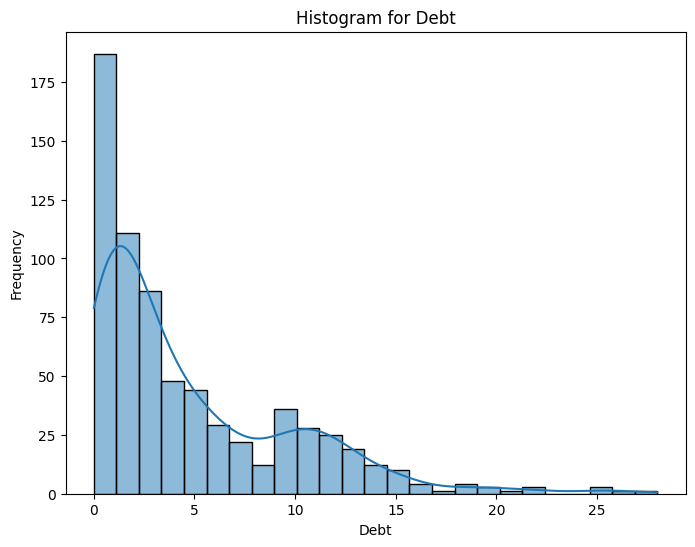

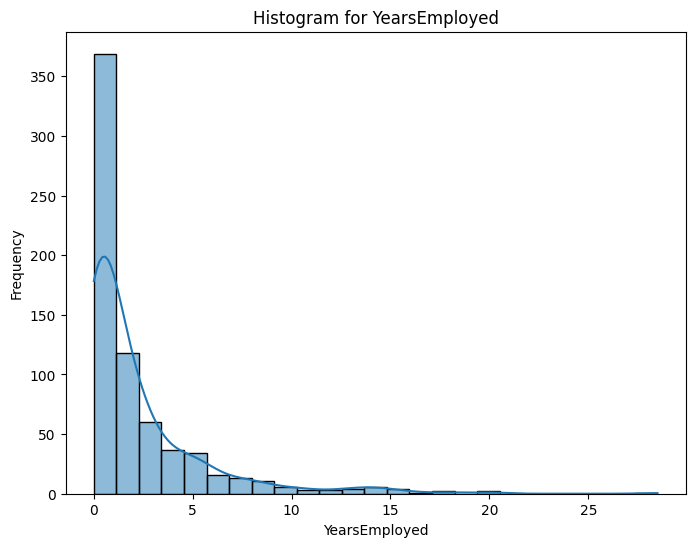

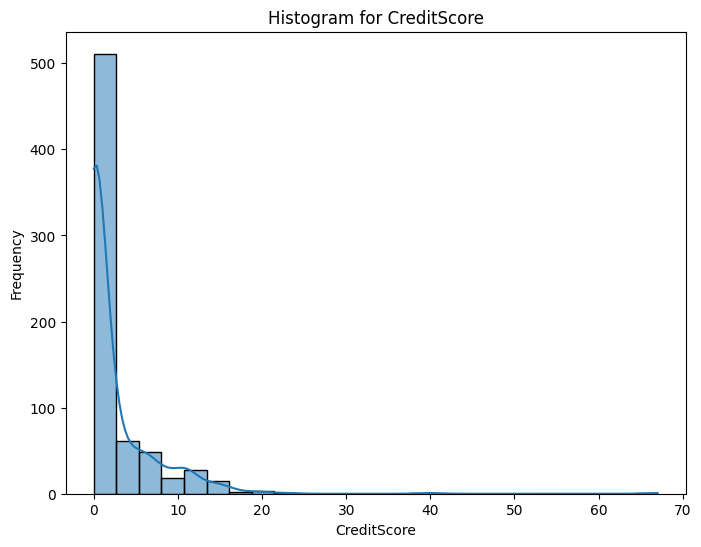

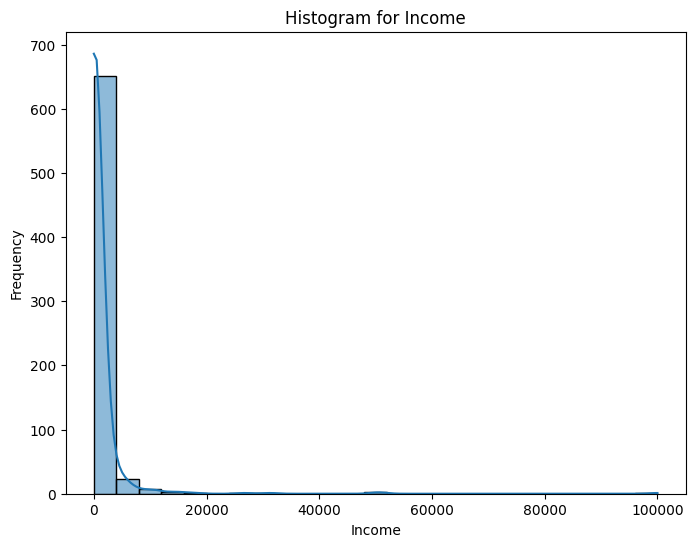

In [ ]:
# Plotting histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, bins=25)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# **3a. Data Preprocessing: Outlier Treatment**

---

Outliers in the dataset are identified and visually represented. [Winsorization](https://www.statisticshowto.com/winsorize/) is then applied to deal with such values and post this treatment, the numerical columns are again visualized using box plots and histograms.

In [ ]:
# Calculating the IQR (Interquartile Range) for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for outliers (you can adjust this threshold)
threshold = 1.5

# Finding the outliers
outliers = ((numeric_columns < (Q1 - threshold * IQR)) | (numeric_columns > (Q3 + threshold * IQR))).any(axis=1)

In [ ]:
# Printing rows with outliers
print("Rows with outliers:")
print(df[outliers])

Rows with outliers:
    Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
6        b  33.17   1.040       u            g              r         h   
7        a  22.92  11.585       u            g             cc         v   
9        b   42.5   4.915       y            p              w         v   
13       b  48.08   6.040       u            g              k         v   
15       b  36.67   4.415       y            p              k         v   
..     ...    ...     ...     ...          ...            ...       ...   
596      a  46.08   3.000       u            g              c         v   
599      b   20.5   2.415       u            g              c         v   
627      b  36.08   2.540       u            g             ff        ff   
676      a  30.58  10.665       u            g              q         h   
689      b     35   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \

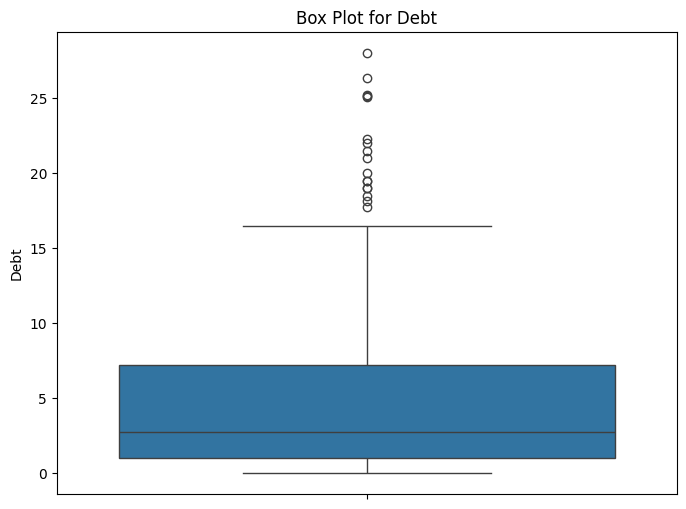

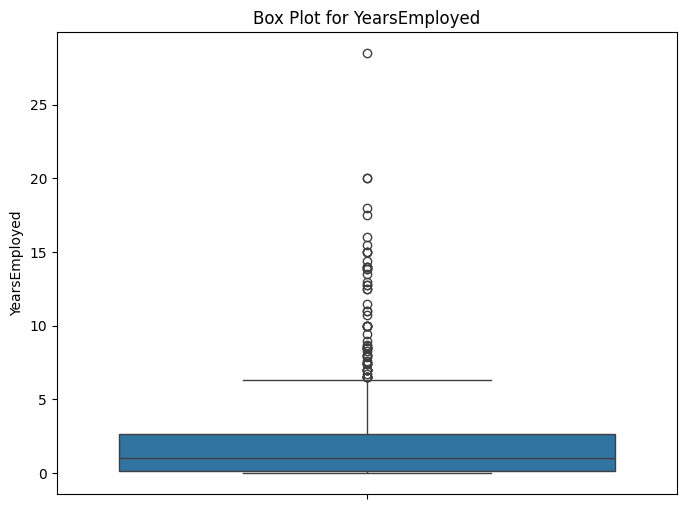

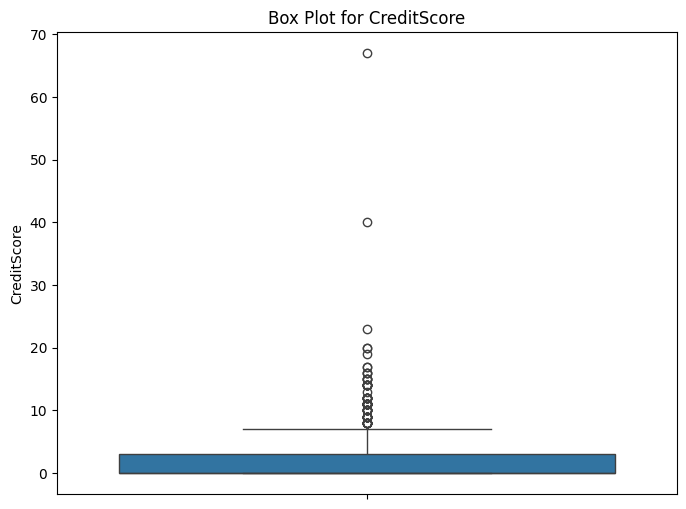

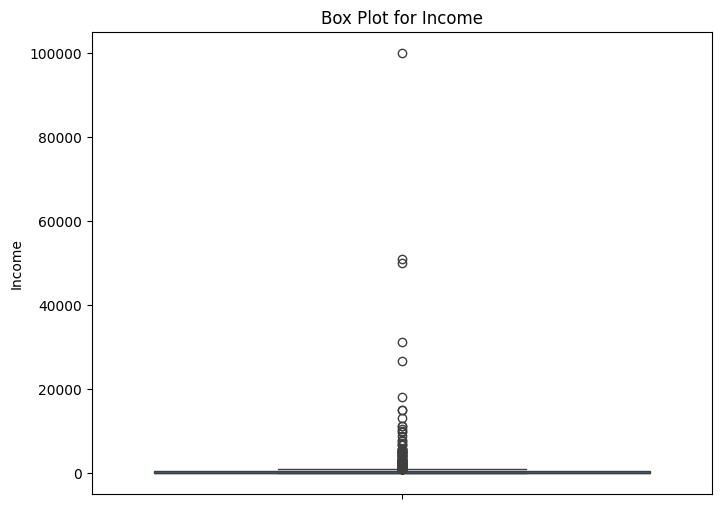

In [ ]:
# Visualizing the outliers using box plots
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
# Defining the Winsorization function
def winsorize_column(data, column_name, lower_percentile, upper_percentile):
    lower_limit = np.percentile(data[column_name], lower_percentile)
    upper_limit = np.percentile(data[column_name], upper_percentile)

    data[column_name] = np.where(data[column_name] < lower_limit, lower_limit, data[column_name])
    data[column_name] = np.where(data[column_name] > upper_limit, upper_limit, data[column_name])

# Defining lower and upper percentiles
lower_percentile = 10
upper_percentile = 90

# Iterating through all numeric columns and apply winsorization
numeric_columns = df.select_dtypes(include=[np.number])
for column in numeric_columns.columns:
    winsorize_column(df, column, lower_percentile, upper_percentile)

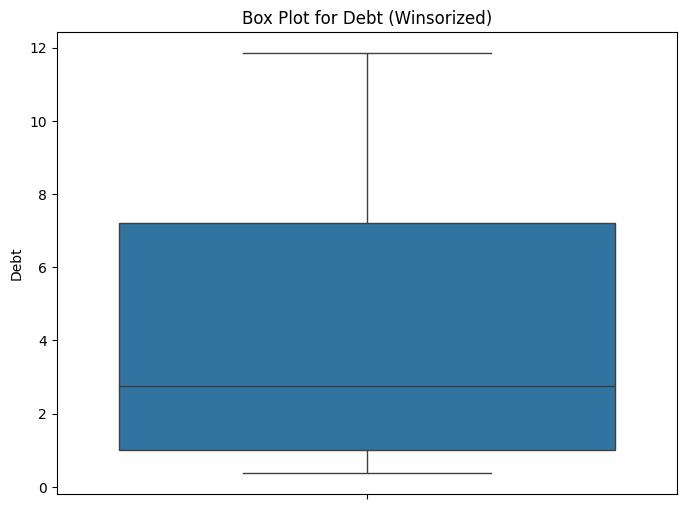

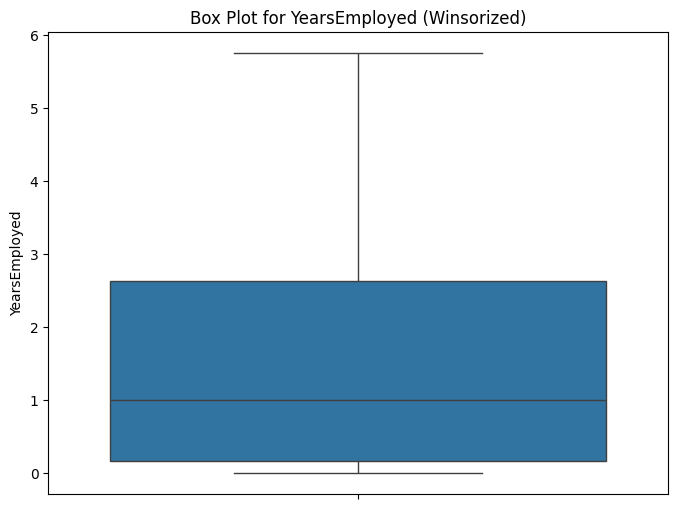

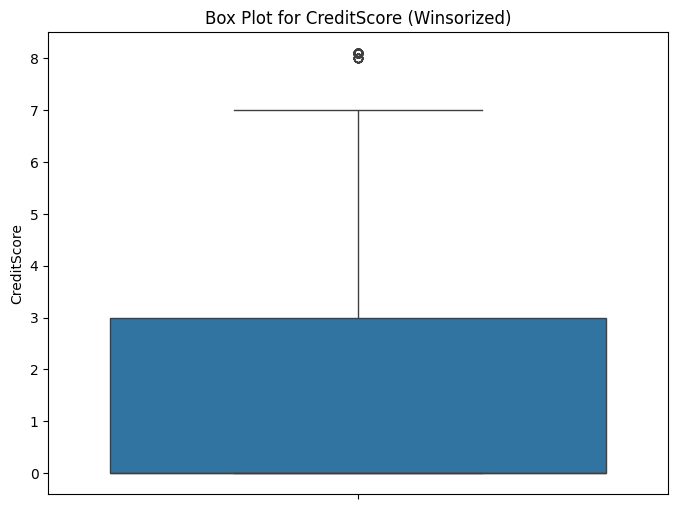

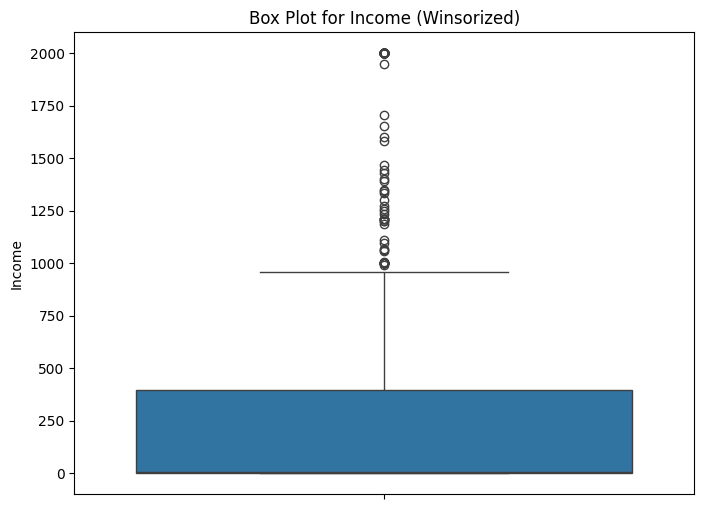

In [ ]:
# Visualizing the winsorized data using box plots for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot for {column} (Winsorized)')
    plt.show()

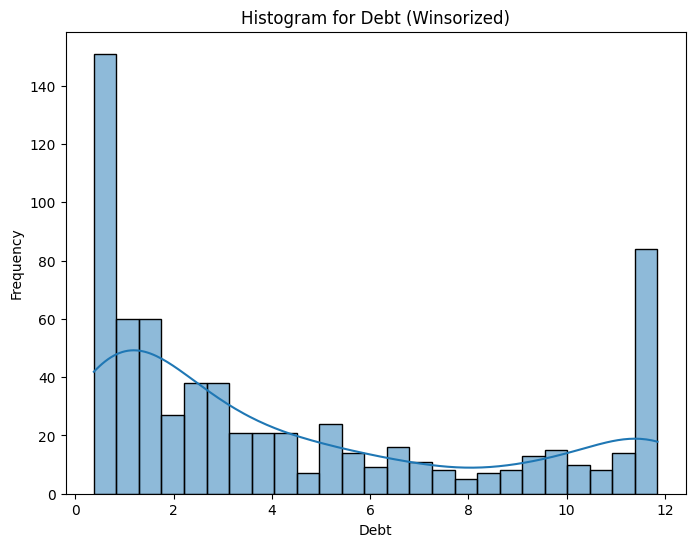

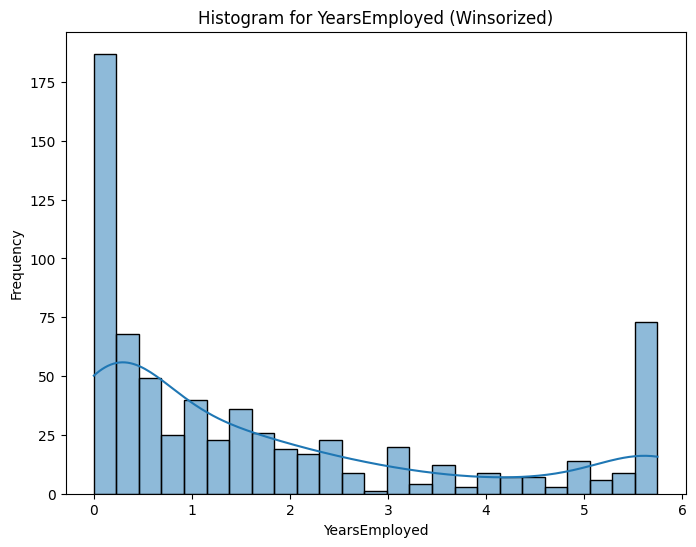

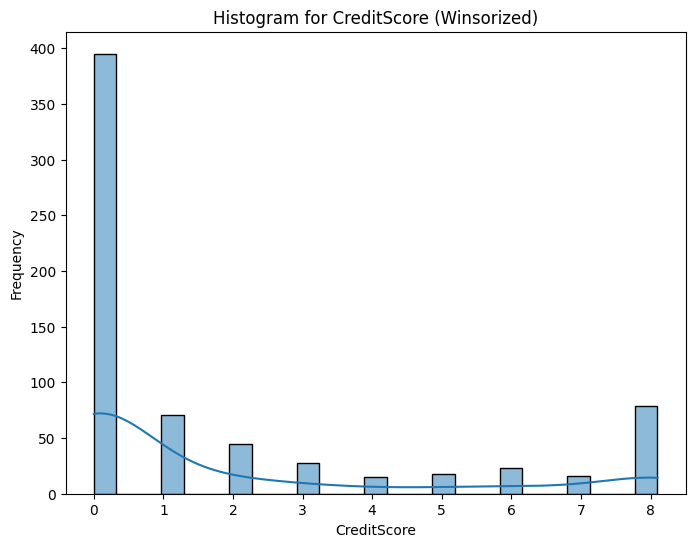

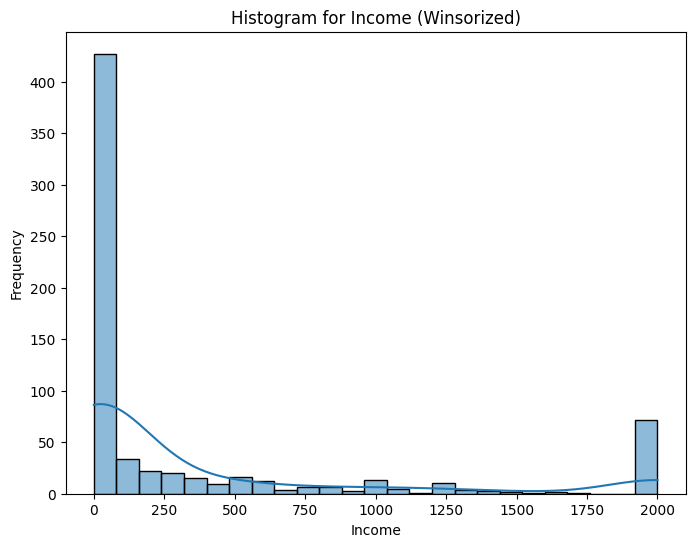

In [ ]:
# Plotting histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, bins=25)
    plt.title(f'Histogram for {column} (Winsorized)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# **3b. Data Preprocessing: Missing Value Treatment**

---

We will address the missing values in the dataset, labelled with '?' and replace them with 'NaN' for the time being

In [ ]:
# Inspecting missing values in the dataset
print(df.isnull().values.sum())

# Replacing the '?'s with NaN
cc_apps = df.replace('?', np.nan)

# Inspecting the missing values again
print('Total NaN: ' + str(cc_apps.isnull().values.sum()))
print('NaN by column:' '\n')
print(cc_apps.isnull().sum())
cc_apps.tail(17)

0
Total NaN: 67
NaN by column:

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.5,2.0000,y,p,e,h,2.000,f,f,0.0,f,g,256,17.0,-
674,a,37.33,2.5000,u,g,i,h,0.210,f,f,0.0,f,g,260,246.0,-
675,a,41.58,1.0400,u,g,aa,v,0.665,f,f,0.0,f,g,240,237.0,-
676,a,30.58,10.6650,u,g,q,h,0.085,f,t,8.1,t,g,129,3.0,-
677,b,19.42,7.2500,u,g,m,v,0.040,f,t,1.0,f,g,100,1.0,-
678,a,17.92,10.2100,u,g,ff,ff,0.000,f,f,0.0,f,g,0,50.0,-
679,a,20.08,1.2500,u,g,c,v,0.000,f,f,0.0,f,g,0,0.0,-
680,b,19.5,0.3750,u,g,k,v,0.290,f,f,0.0,f,g,280,364.0,-
681,b,27.83,1.0000,y,p,d,h,3.000,f,f,0.0,f,g,176,537.0,-
682,b,17.08,3.2900,u,g,i,v,0.335,f,f,0.0,t,g,140,2.0,-


All of the question marks were replaced with NaNs. This will assist us in the next missing value treatment that we will undertake.

An key question that is highlighted here is why we place such a high value on missing values. Can't they just be ignored? Ignoring missing values can have a significant impact on the performance of a machine learning model. While ignoring the missing values, our machine learning model may miss out on dataset information that could be valuable for training. Then there are numerous models, such as LDA, that cannot handle missing values implicitly.

To avoid this issue, we will use a procedure known as median imputation to impute the missing numeric data.

In [ ]:
#Calculating median values for numeric columns
median_values = numeric_columns.median()

#Filling missing values with median values
cc_apps[numeric_columns.columns] = cc_apps[numeric_columns.columns].fillna(median_values)

# Counting the number of NaNs in the dataset to verify
print('Total NaN: ' + str(cc_apps.isnull().values.sum()))
cc_apps.isnull().sum()

Total NaN: 67


Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

We have successfully addressed the missing values in the numerical columns. Columns 0, 1, 3, 4, 5, 6, and 13 still have some missing values that must be imputed. Because all of these columns contain non-numeric data, the median imputation technique would fail here. This requires a different approach.

We will fill in the missing values with the most common values found in the appropriate columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> for missing value imputing for categorical data in general.

In [ ]:
# Iterating over each column of cc_apps
for col in cc_apps:
    # Checking if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Imputing with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Counting the number of NaNs in the dataset and printing the counts to verify
print('Total missing values:' + str(cc_apps.isnull().values.sum()))
print('Missing values in each column:')
cc_apps.isnull().sum()

Total missing values:0
Missing values in each column:


Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

# **3c. Data Preprocessing: Label Encoding**

---

The missing values are now handled successfully.

Next, we shall convert all non-numeric values to numeric values. Not only does this result in speedier processing, but many machine learning models  require the data to be in a strictly numeric format. This will be accomplished through the use of a technique known as <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.

In [ ]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le = LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in cc_apps:
    # Comparing if the dtype is object
    if cc_apps[col].dtypes =='object':
    # Using LabelEncoder to do the numeric transformation
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])
#  information of the new dataframe
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    int64  
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   EducationLevel  690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    float64
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    float64
 15  ApprovalStatus  690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


# **3d. Data Preprocessing: Data Splitting**

---

Now, we'll divide our data into train and test sets to prepare it for the two stages of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or to drive the machine learning model's training process. As a result, we split the data first and then apply the scaling.

Furthermore, characteristics such as DriversLicense and ZipCode are not as important in predicting credit card approvals as the other factors in the dataset. We should discard them in order to create the greatest machine learning model possible. This is referred to as feature selection in the Data Science literature.

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Dropping the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
print(cc_apps.head())
cc_apps = cc_apps.values

# Segregating features and labels into separate variables
X,y = cc_apps[:,0:12] , cc_apps[:,13]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

   Gender  Age   Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0       1  156  0.375        2             1              13          8   
1       0  328  4.460        2             1              11          4   
2       0   89  0.500        2             1              11          4   
3       1  125  1.540        2             1              13          8   
4       1   43  5.625        2             1              13          8   

   YearsEmployed  PriorDefault  Employed  CreditScore  Citizen  Income  \
0           1.25             1         1          1.0        0     0.0   
1           3.04             1         1          6.0        0   560.0   
2           1.50             1         0          0.0        0   824.0   
3           3.75             1         1          5.0        0     3.0   
4           1.71             1         0          0.0        2     0.0   

   ApprovalStatus  
0               0  
1               0  
2               0  
3               0  
4   

# **3e. Data Preprocessing: Data Scaling**

---

The data has now been divided into two distinct sets: train and test. Only one more preprocessing step of scaling remains before we can fit a machine learning model to the data.

Let's try to figure out what these scaled values mean in real life. As an illustration, consider CreditScore. A person's credit score reflects their creditworthiness based on their credit history. The higher this score, the more financially reliable a person is thought to be. So, since we're rescaling all values to the range of 0-1, a CreditScore of 1 is the highest.

In [ ]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiating MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# **4. Fitting a logistic regression model to the train set**

---

Predicting whether or not a credit card application will be approved is essentially a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more cases with "Denied" status than instances with "Approved" status. In particular, out of 690 occurrences, 383 (55.5%) petitions were declined and 307 (44.5%) applications were allowed.

This gives us a starting point. A good machine learning model should be able to anticipate the application state based on these statistics.

Which model should we choose? A question to consider is if the factors that influence the credit card approval decision process are related. Although we can test correlation, doing so is beyond the scope of this notebook, so we'll rely on our intuition that they are for the time being. We'll take use of the fact that generalized linear models perform better in these circumstances because of this association. Let's start with a Logistic Regression model (a generalized linear model) for our machine learning modeling.

In [ ]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiating a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fitting logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

# **5. Making predictions and evaluating performance**

---

But how effective is our model?

We will now assess our model's <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a> on the test set. However, we shall also examine the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of forecasting credit card applications, it is equally vital to examine if our machine learning model can anticipate the approval status of previously declined applications. If our model fails to perform well in this area, it may wind up approving an application that should not have been authorized. The confusion matrix allows us to evaluate our model's performance in these areas.

In [ ]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix
# Using logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of logreg model and printing it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Printing the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8377192982456141
Confusion matrix: 
  [[93 10]
 [27 98]]


# **6. Grid searching and making the model perform better**

---

Our model was great! It achieved an accuracy score of about 84%.

The first element of the confusion matrix's first row denotes the true negatives, which are the number of negative cases (denied applications) properly predicted by the model. The last member of the confusion matrix's second row denotes the true positives, which are the number of positive cases (accepted applications) properly predicted by the model.

Let's see if we can improve. To increase the model's capacity to forecast credit card approvals, we can run a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> on the model parameters.

The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> has several hyperparameters, but we will grid search over the following two: max_iter, tol

In [ ]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Defining the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Creating a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

# **7. Finding the best performing model**

---

The grid of hyperparameter values has been defined and transformed into a single dictionary format that GridSearchCV() requires as one of its parameters. We'll now start the grid search to discover which values perform the best.

We will use our previous logreg model to instantiate GridSearchCV() with all of the data we have. We shall supply X (scaled version) and y instead of passing train and test sets separately. GridSearchCV() will also be told to run a five-fold <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a>.

We'll finish the notebook by saving the highest-achieved score and the best settings.

We tackled several of the most well-known preprocessing techniques when developing this credit card predictor, including scaling, label encoding, and missing value imputation. We completed with some machine learning to forecast whether a person's credit card application would be approved or denied based on some information about that person.

In [ ]:
# Instantiating GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Using scaler to rescale X and assigning it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fitting data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarizing results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.843478 using {'max_iter': 100, 'tol': 0.01}
